In [1]:
import numpy as np
import pandas as pd
from heatgeo.embedding import HeatGeo
import scprep
import scanpy as sc
import phate


In [2]:
data = sc.read("../data/sea_ad_merfish_used_in_analysis_subset12000.h5ad")

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
celltypes = data.obs["Subclass"]
celltypes.to_csv("../data/sea_ad_merfish_used_in_analysis_subset12000_celltypes.csv")

In [4]:
phate_op = phate.PHATE()
X_phate = phate_op.fit_transform(data.X)

Calculating PHATE...
  Running PHATE on 12000 observations and 180 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4.70 seconds.
    Calculating KNN search...
    Calculated KNN search in 38.25 seconds.
    Calculating affinities...
    Calculated affinities in 4.30 seconds.
  Calculated graph and diffusion operator in 47.32 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.34 seconds.
    Calculating KMeans...
    Calculated KMeans in 13.16 seconds.
  Calculated landmark operator in 18.79 seconds.
  Calculating optimal t...
    Automatically selected t = 38
  Calculated optimal t in 10.52 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 5.87 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 11.91 seconds.
Calculated PHATE in 94.44 seconds.


In [5]:
pca_loadings = phate_op.graph.data_nu
pca_components = phate_op.graph.data_pca.components_

In [6]:
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(pca_loadings)

Using s_gd2 for MDS. None


<Axes: xlabel='HeatGeo1', ylabel='HeatGeo2'>

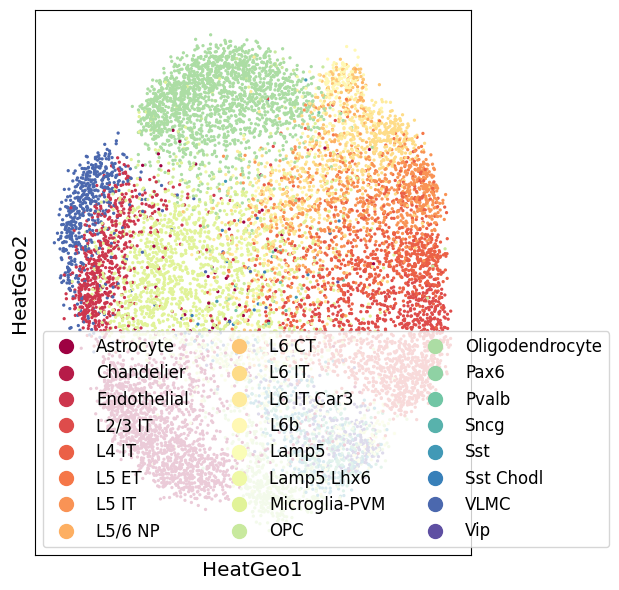

In [7]:
scprep.plot.scatter2d(emb, c=celltypes, figsize=(6, 6), cmap="Spectral", ticks=False, label_prefix="HeatGeo")

In [8]:
np.save("../data/sea_ad_merfish_heatgeo.npy", emb)
np.save("../data/sea_ad_merfish_pca.npy", pca_loadings)
np.save("../data/sea_ad_merfish_phate.npy", X_phate)
np.save("../data/sea_ad_merfish_pca_components.npy", pca_components)